## Predicting Stay of Healthcare patients

Given *data about patient stay in hospitals*, we need to predict the **stay duration** of patients.

Data source: https://www.kaggle.com/datasets/nehaprabhavalkar/av-healthcare-analytics-ii

### Importing Libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
import tensorflow as tf

In [2]:
data = pd.read_csv('healthcare/train_data.csv')
data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

### Preprocessing

In [35]:
df = data.copy()

In [36]:
df.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [37]:
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [38]:
def impute_missing_values(df, columns):
    df = df.copy()
    for column in columns:
        df[column] = df[column].fillna(df[column].mean())
    return df

df = impute_missing_values(df, ['Bed Grade', 'City_Code_Patient'])

In [39]:
df.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

### Encoding

In [40]:
df.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [41]:
def get_categorical_uniques(df):
    categorical_columns = [column for column in df.dtypes.index if df.dtypes[column] == 'object']
    categorical_uniques = {column: df[column].unique() for column in categorical_columns}
    return categorical_uniques

get_categorical_uniques(df)

{'Hospital_type_code': array(['c', 'e', 'b', 'a', 'f', 'd', 'g'], dtype=object),
 'Hospital_region_code': array(['Z', 'X', 'Y'], dtype=object),
 'Department': array(['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease',
        'surgery'], dtype=object),
 'Ward_Type': array(['R', 'S', 'Q', 'P', 'T', 'U'], dtype=object),
 'Ward_Facility_Code': array(['F', 'E', 'D', 'B', 'A', 'C'], dtype=object),
 'Type of Admission': array(['Emergency', 'Trauma', 'Urgent'], dtype=object),
 'Severity of Illness': array(['Extreme', 'Moderate', 'Minor'], dtype=object),
 'Age': array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
        '11-20', '0-10', '91-100'], dtype=object),
 'Stay': array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
        'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)}

In [42]:
onehot_columns = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code']

In [43]:
def onehot_encode(df, columns):
    df = df.copy()
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column, dtype=int)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [44]:
df = onehot_encode(df, onehot_columns)

In [45]:
df

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,...,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Ward_Facility_Code_A,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F
0,1,8,3,3,2.0,31397,7.0,Emergency,Extreme,2,...,1,0,0,0,0,0,0,0,0,1
1,2,2,5,2,2.0,31397,7.0,Trauma,Extreme,2,...,0,1,0,0,0,0,0,0,0,1
2,3,10,1,2,2.0,31397,7.0,Trauma,Extreme,2,...,0,1,0,0,0,0,0,0,1,0
3,4,26,2,2,2.0,31397,7.0,Trauma,Extreme,2,...,1,0,0,0,0,0,0,1,0,0
4,5,26,2,2,2.0,31397,7.0,Trauma,Extreme,2,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,6,3,4.0,86499,23.0,Emergency,Moderate,3,...,0,0,0,0,0,0,0,0,0,1
318434,318435,24,1,2,4.0,325,8.0,Urgent,Moderate,4,...,0,0,0,0,0,0,0,0,1,0
318435,318436,7,4,3,4.0,125235,10.0,Emergency,Minor,3,...,1,0,0,0,0,0,0,0,0,1
318436,318437,11,2,3,3.0,91081,8.0,Trauma,Minor,5,...,0,0,0,0,0,0,0,1,0,0


In [46]:
categorical_uniques = get_categorical_uniques(df)
categorical_uniques

{'Type of Admission': array(['Emergency', 'Trauma', 'Urgent'], dtype=object),
 'Severity of Illness': array(['Extreme', 'Moderate', 'Minor'], dtype=object),
 'Age': array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
        '11-20', '0-10', '91-100'], dtype=object),
 'Stay': array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
        'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)}

In [47]:
for column in categorical_uniques:
    categorical_uniques[column] = sorted(categorical_uniques[column])

In [48]:
categorical_uniques

{'Type of Admission': ['Emergency', 'Trauma', 'Urgent'],
 'Severity of Illness': ['Extreme', 'Minor', 'Moderate'],
 'Age': ['0-10',
  '11-20',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100'],
 'Stay': ['0-10',
  '11-20',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100',
  'More than 100 Days']}

In [49]:
unique_list = categorical_uniques['Type of Admission']
unique_list.insert(0, unique_list.pop(unique_list.index('Urgent')))
unique_list.insert(0, unique_list.pop(unique_list.index('Trauma')))

unique_list = categorical_uniques['Severity of Illness']
unique_list.insert(0, unique_list.pop(unique_list.index('Moderate')))
unique_list.insert(0, unique_list.pop(unique_list.index('Minor')))

In [50]:
categorical_uniques

{'Type of Admission': ['Trauma', 'Urgent', 'Emergency'],
 'Severity of Illness': ['Minor', 'Moderate', 'Extreme'],
 'Age': ['0-10',
  '11-20',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100'],
 'Stay': ['0-10',
  '11-20',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100',
  'More than 100 Days']}

In [51]:
stay_mappings = {value: index for index, value in enumerate(categorical_uniques['Stay'])}
stay_mappings

{'0-10': 0,
 '11-20': 1,
 '21-30': 2,
 '31-40': 3,
 '41-50': 4,
 '51-60': 5,
 '61-70': 6,
 '71-80': 7,
 '81-90': 8,
 '91-100': 9,
 'More than 100 Days': 10}

In [52]:
def ordinal_encode(df, uniques):
    df = df.copy()
    for column in uniques:
        df[column] = df[column].apply(lambda x: uniques[column].index(x))
    return df

In [53]:
df = ordinal_encode(df, categorical_uniques)

In [54]:
df

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,...,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Ward_Facility_Code_A,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F
0,1,8,3,3,2.0,31397,7.0,2,2,2,...,1,0,0,0,0,0,0,0,0,1
1,2,2,5,2,2.0,31397,7.0,0,2,2,...,0,1,0,0,0,0,0,0,0,1
2,3,10,1,2,2.0,31397,7.0,0,2,2,...,0,1,0,0,0,0,0,0,1,0
3,4,26,2,2,2.0,31397,7.0,0,2,2,...,1,0,0,0,0,0,0,1,0,0
4,5,26,2,2,2.0,31397,7.0,0,2,2,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,6,3,4.0,86499,23.0,2,1,3,...,0,0,0,0,0,0,0,0,0,1
318434,318435,24,1,2,4.0,325,8.0,1,1,4,...,0,0,0,0,0,0,0,0,1,0
318435,318436,7,4,3,4.0,125235,10.0,2,0,3,...,1,0,0,0,0,0,0,0,0,1
318436,318437,11,2,3,3.0,91081,8.0,0,0,5,...,0,0,0,0,0,0,0,1,0,0


In [55]:
df['Stay']

0         0
1         4
2         3
3         4
4         4
         ..
318433    1
318434    3
318435    1
318436    1
318437    0
Name: Stay, Length: 318438, dtype: int64

In [57]:
(df.dtypes == 'object').sum()

np.int64(0)

In [58]:
df

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,...,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Ward_Facility_Code_A,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F
0,1,8,3,3,2.0,31397,7.0,2,2,2,...,1,0,0,0,0,0,0,0,0,1
1,2,2,5,2,2.0,31397,7.0,0,2,2,...,0,1,0,0,0,0,0,0,0,1
2,3,10,1,2,2.0,31397,7.0,0,2,2,...,0,1,0,0,0,0,0,0,1,0
3,4,26,2,2,2.0,31397,7.0,0,2,2,...,1,0,0,0,0,0,0,1,0,0
4,5,26,2,2,2.0,31397,7.0,0,2,2,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,6,3,4.0,86499,23.0,2,1,3,...,0,0,0,0,0,0,0,0,0,1
318434,318435,24,1,2,4.0,325,8.0,1,1,4,...,0,0,0,0,0,0,0,0,1,0
318435,318436,7,4,3,4.0,125235,10.0,2,0,3,...,1,0,0,0,0,0,0,0,0,1
318436,318437,11,2,3,3.0,91081,8.0,0,0,5,...,0,0,0,0,0,0,0,1,0,0


### Scaling

In [67]:
df.set_index('case_id', inplace=True)

In [72]:
y = df['Stay'].copy()
X = df.drop('Stay', axis=1).copy()

In [73]:
y

case_id
1         0
2         4
3         3
4         4
5         4
         ..
318434    1
318435    3
318436    1
318437    1
318438    0
Name: Stay, Length: 318438, dtype: int64

In [74]:
X

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,...,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Ward_Facility_Code_A,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F
case_id,,,,,,,,,,,,,,,,,,,,,
1,8,3,3,2.0,31397,7.0,2,2,2,5,...,1,0,0,0,0,0,0,0,0,1
2,2,5,2,2.0,31397,7.0,0,2,2,5,...,0,1,0,0,0,0,0,0,0,1
3,10,1,2,2.0,31397,7.0,0,2,2,5,...,0,1,0,0,0,0,0,0,1,0
4,26,2,2,2.0,31397,7.0,0,2,2,5,...,1,0,0,0,0,0,0,1,0,0
5,26,2,2,2.0,31397,7.0,0,2,2,5,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318434,6,6,3,4.0,86499,23.0,2,1,3,4,...,0,0,0,0,0,0,0,0,0,1
318435,24,1,2,4.0,325,8.0,1,1,4,8,...,0,0,0,0,0,0,0,0,1,0
318436,7,4,3,4.0,125235,10.0,2,0,3,7,...,1,0,0,0,0,0,0,0,0,1


In [75]:
# Scale X
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
X

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,...,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Ward_Facility_Code_A,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F
case_id,,,,,,,,,,,,,,,,,,,,,
1,-1.195176,-0.571055,-0.169177,-0.716855,-0.904442,-0.053458,1.212557,1.646648,-0.727923,0.461600,...,1.220175,-0.568572,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,-0.458683,1.350633
2,-1.890124,0.073580,-1.025217,-0.716855,-0.904442,-0.053458,-0.974973,1.646648,-0.727923,0.461600,...,-0.819554,1.758792,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,-0.458683,1.350633
3,-0.963527,-1.215691,-1.025217,-0.716855,-0.904442,-0.053458,-0.974973,1.646648,-0.727923,0.461600,...,-0.819554,1.758792,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,2.180153,-0.740394
4,0.889668,-0.893373,-1.025217,-0.716855,-0.904442,-0.053458,-0.974973,1.646648,-0.727923,0.461600,...,1.220175,-0.568572,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,2.268564,-0.458683,-0.740394
5,0.889668,-0.893373,-1.025217,-0.716855,-0.904442,-0.053458,-0.974973,1.646648,-0.727923,0.461600,...,-0.819554,1.758792,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,2.268564,-0.458683,-0.740394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318434,-1.426825,0.395897,-0.169177,1.574123,0.546379,3.342582,1.212557,0.138090,-0.161049,-0.067622,...,-0.819554,-0.568572,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,-0.458683,1.350633
318435,0.658018,-1.215691,-1.025217,1.574123,-1.722559,0.158795,0.118792,0.138090,0.405826,2.049268,...,-0.819554,-0.568572,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,2.180153,-0.740394
318436,-1.311001,-0.248738,-0.169177,1.574123,1.566288,0.583300,1.212557,-1.370469,-0.161049,1.520045,...,1.220175,-0.568572,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,-0.458683,1.350633


In [76]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)

In [77]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [81]:
inputs = tf.keras.Input(shape=(38, ))
x = tf.keras.layers.Dense(16, activation='relu')(inputs)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(11, activation='softmax')(x)

nn_model = tf.keras.Model(inputs=inputs, outputs=outputs)

nn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 32
epochs = 10

history = nn_model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs
)

Epoch 1/10


2025-12-25 10:31:09.495109: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 30977600 exceeds 10% of free system memory.


6369/6369 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.3809 - loss: 1.6308 - val_accuracy: 0.3988 - val_loss: 1.5825
Epoch 2/10
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.4021 - loss: 1.5674 - val_accuracy: 0.4013 - val_loss: 1.5651
Epoch 3/10
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.4042 - loss: 1.5557 - val_accuracy: 0.4031 - val_loss: 1.5589
Epoch 4/10
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.4056 - loss: 1.5502 - val_accuracy: 0.4046 - val_loss: 1.5551
Epoch 5/10
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.4064 - loss: 1.5467 - val_accuracy: 0.4059 - val_loss: 1.5511
Epoch 6/10
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.4072 - loss: 1.5436 - val_accuracy: 0.4067 - val_loss: 1.5549
Epoch 7/10
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.4086 - loss: 1.5410 - val_accuracy: 0.4091 - val_loss: 1.5421
Epoch 8/10
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.4090 - loss: 1.5389 - val

In [82]:
print(f"Logistic Regression Acc: {log_model.score(X_test, y_test)}")
print(f"     Neural Network Acc: {nn_model.evaluate(X_test, y_test, verbose=0)[1]}")

Logistic Regression Acc: 0.38958673533475696
     Neural Network Acc: 0.4102656841278076


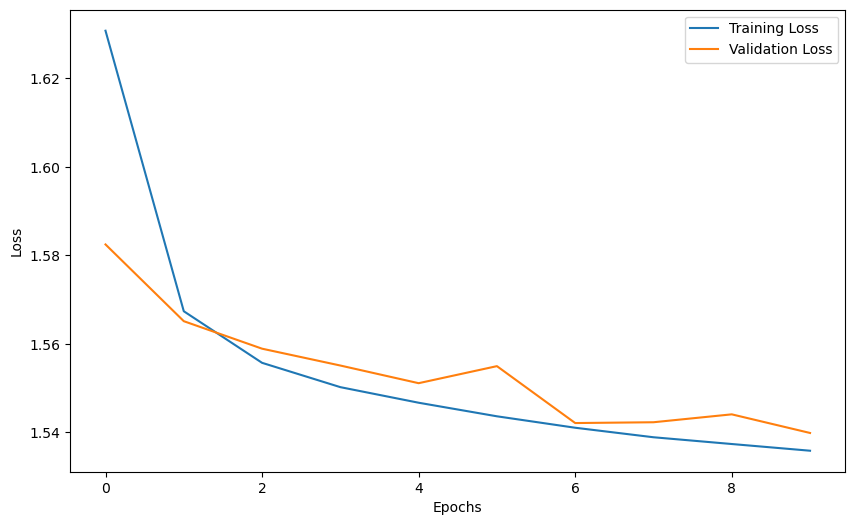

In [84]:
plt.figure(figsize=(10, 6))

plt.plot(range(epochs), history.history['loss'], label='Training Loss')
plt.plot(range(epochs), history.history['val_loss'], label='Validation Loss')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

In [85]:
np.argmin(history.history['val_loss']) + 1

np.int64(10)